In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
ai_private_investment = pd.read_csv("https://ourworldindata.org/grapher/private-investment-in-artificial-intelligence-cset.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

In [79]:
ai_private_investment.head()

,Entity,Code,Year,investment_estimated__field_all
0,Albania,ALB,2014,4578426
1,Albania,ALB,2016,2258014
2,Albania,ALB,2019,7419258
3,Albania,ALB,2020,4187914
4,Algeria,DZA,2021,0


In [81]:
ai_private_investment[ai_private_investment["investment_estimated__field_all"] == 0]

,Entity,Code,Year,investment_estimated__field_all
4,Algeria,DZA,2021,0
5,Algeria,DZA,2022,0
41,Azerbaijan,AZE,2022,0
42,Bahrain,BHR,2020,0
44,Bahrain,BHR,2022,0
...,...,...,...,...
820,Zambia,ZMB,2023,0
821,Zimbabwe,ZWE,2019,0
822,Zimbabwe,ZWE,2020,0
823,Zimbabwe,ZWE,2021,0


In [83]:
usa_ai_private_investment = ai_private_investment[ai_private_investment["Code"] == "USA"]

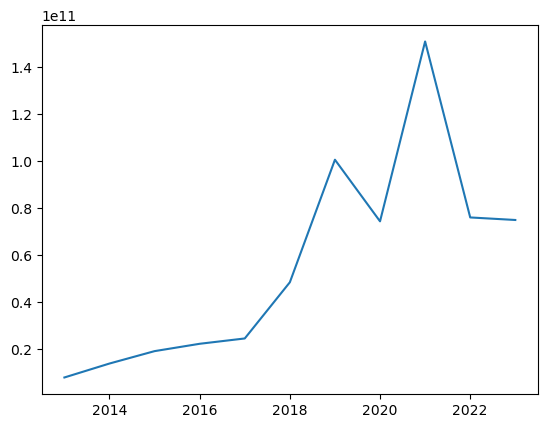

In [85]:
plt.plot(usa_ai_private_investment["Year"], usa_ai_private_investment["investment_estimated__field_all"])

In [87]:
ai_countries = ai_private_investment["Code"].unique()

In [89]:
energy_emissions_df = pd.read_csv("https://ourworldindata.org/grapher/per-capita-consumption-based-co-emissions-vs-per-capita-energy-consumption.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

In [90]:
energy_emissions_df.head()

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region
0,Afghanistan,AFG,1949,0.001992,NaN,7356890.0,NaN
1,Afghanistan,AFG,1950,0.010837,NaN,7776182.0,NaN
2,Afghanistan,AFG,1951,0.011625,NaN,7879343.0,NaN
3,Afghanistan,AFG,1952,0.011468,NaN,7987783.0,NaN
4,Afghanistan,AFG,1953,0.013123,NaN,8096703.0,NaN


In [93]:
ai_countries_energy_emissions = energy_emissions_df[energy_emissions_df["Code"].isin(ai_countries)]

In [95]:
ai_countries_energy_emissions.head()

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region
604,Albania,ALB,1933,0.007160,NaN,1023495.0,NaN
605,Albania,ALB,1934,0.007087,NaN,1034040.0,NaN
606,Albania,ALB,1935,0.017536,NaN,1044694.0,NaN
607,Albania,ALB,1936,0.121473,NaN,1055458.0,NaN
608,Albania,ALB,1937,0.278267,NaN,1066333.0,NaN


In [97]:
len(ai_countries)

115

In [99]:
us_energy_emissions_df = energy_emissions_df[energy_emissions_df["Code"] == "USA"]

In [101]:
us_energy_emissions_df.head()

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region
56867,United States,USA,1800,0.042136,NaN,6000000.0,NaN
56868,United States,USA,1801,0.043749,NaN,6113782.0,NaN
56869,United States,USA,1802,0.046464,NaN,6229723.0,NaN
56870,United States,USA,1803,0.046753,NaN,6347862.0,NaN
56871,United States,USA,1804,0.051548,NaN,6468241.0,NaN


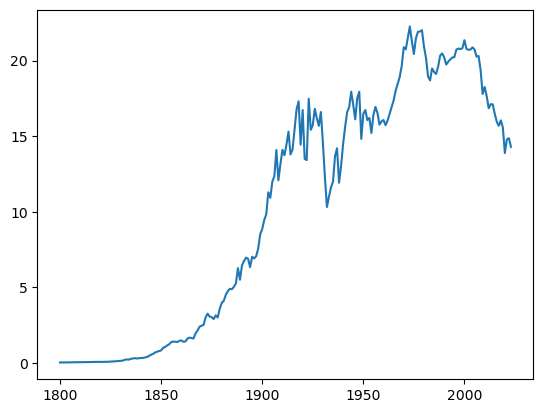

In [103]:
plt.plot(us_energy_emissions_df["Year"], us_energy_emissions_df["emissions_total_per_capita"])

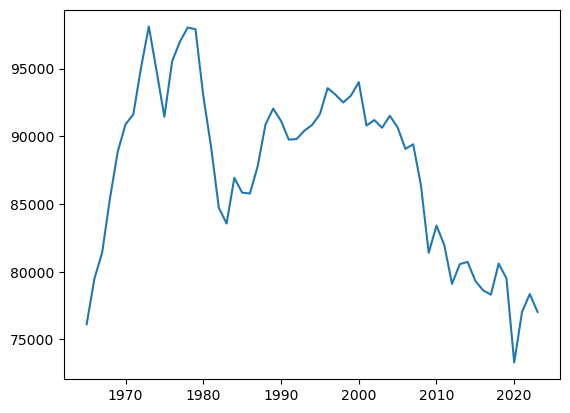

In [105]:
plt.plot(us_energy_emissions_df["Year"], us_energy_emissions_df["primary_energy_consumption_per_capita__kwh"])

Text(0.5, 0.98, 'US: Carbon Emissions and Energy Consumption per Capita')

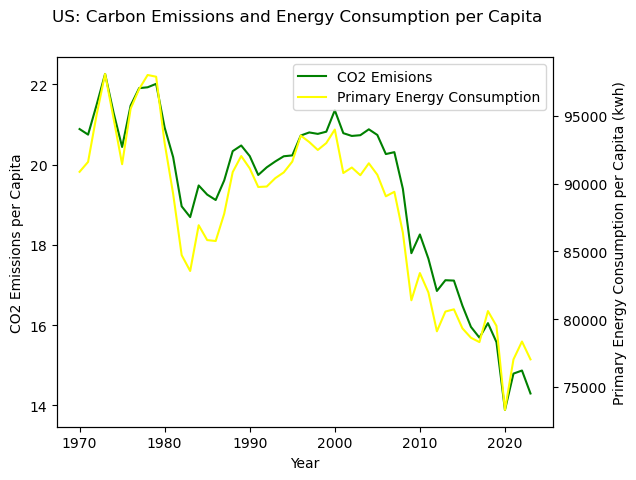

In [107]:
f, ax1 = plt.subplots()
ax2 = ax1.twinx()

# CO2 Emissions Plot

us_energy_emissions_df_after_1970 = us_energy_emissions_df[us_energy_emissions_df["Year"] >= 1970]

p1 = ax1.plot(us_energy_emissions_df_after_1970["Year"], us_energy_emissions_df_after_1970["emissions_total_per_capita"], color = "green", label = "CO2 Emisions")
ax1.set_ylabel("CO2 Emissions per Capita")
ax1.set_xlabel("Year")

p2 = ax2.plot(us_energy_emissions_df_after_1970["Year"], us_energy_emissions_df_after_1970["primary_energy_consumption_per_capita__kwh"], color = "yellow", label = "Primary Energy Consumption")
ax2.set_ylabel("Primary Energy Consumption per Capita (kwh)")

plots = p1 + p2
labs = [l.get_label() for l in plots]
ax1.legend(plots, labs, loc = 0)

f.suptitle("US: Carbon Emissions and Energy Consumption per Capita")

In [109]:
# Join the dataframes
ai_private_investment # AI private investment

ai_countries_energy_emissions # Energy emissions

new_df = pd.merge(ai_countries_energy_emissions, ai_private_investment, how = "left", left_on = ["Entity", "Code", "Year"], right_on = ["Entity", "Code", "Year"])


In [111]:
new_df.head()

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region,investment_estimated__field_all
0,Albania,ALB,1933,0.007160,NaN,1023495.0,NaN,NaN
1,Albania,ALB,1934,0.007087,NaN,1034040.0,NaN,NaN
2,Albania,ALB,1935,0.017536,NaN,1044694.0,NaN,NaN
3,Albania,ALB,1936,0.121473,NaN,1055458.0,NaN,NaN
4,Albania,ALB,1937,0.278267,NaN,1066333.0,NaN,NaN


In [113]:
new_df_2000 = new_df[new_df["Year"] >= 2000]

In [115]:
new_df_2000_no_na = new_df_2000.dropna(subset = ["investment_estimated__field_all"])

In [117]:
new_df_2000_no_na

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region,investment_estimated__field_all
81,Albania,ALB,2014,2.066174,11809.4610,2903748.0,NaN,4578426.0
83,Albania,ALB,2016,1.598409,13823.7480,2897868.0,NaN,2258014.0
86,Albania,ALB,2019,1.673111,11585.5550,2885012.0,NaN,7419258.0
87,Albania,ALB,2020,1.640399,11158.0030,2871951.0,NaN,4187914.0
366,Algeria,DZA,2021,4.012330,16017.6530,44761101.0,NaN,0.0
...,...,...,...,...,...,...,...,...
28753,Zambia,ZMB,2023,0.373911,NaN,20723968.0,Africa,0.0
29057,Zimbabwe,ZWE,2019,0.672038,3003.6553,15271377.0,NaN,0.0
29058,Zimbabwe,ZWE,2020,0.547083,2680.1318,15526888.0,NaN,0.0
29059,Zimbabwe,ZWE,2021,0.645913,2635.1536,15797220.0,NaN,0.0


In [119]:
china_energy_emissions_df = energy_emissions_df[energy_emissions_df["Entity"] == "China"]
china_energy_emissions_df.head()

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region
10793,China,CHN,1907,0.048403,NaN,411008255.0,NaN
10794,China,CHN,1908,0.055021,NaN,413224872.0,NaN
10795,China,CHN,1909,0.058310,NaN,415905832.0,NaN
10796,China,CHN,1910,0.059680,NaN,419058430.0,NaN
10797,China,CHN,1911,0.058271,NaN,422690056.0,NaN


Text(0.5, 0.98, 'China: Carbon Emissions and Energy Consumption per Capita')

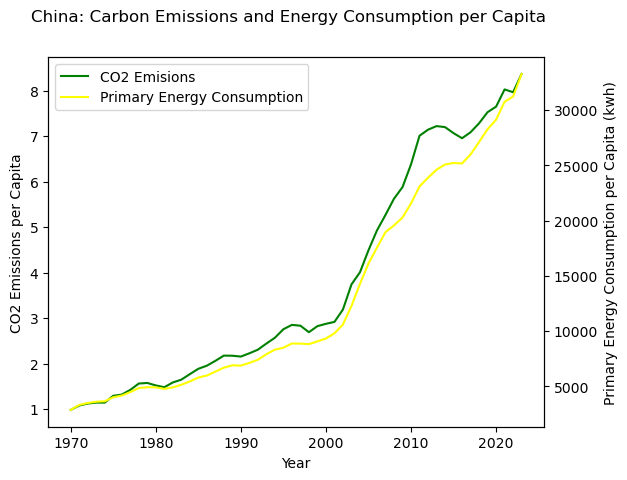

In [121]:
f, ax1 = plt.subplots()
ax2 = ax1.twinx()

# CO2 Emissions Plot

china_energy_emissions_df_after_1970 = china_energy_emissions_df[china_energy_emissions_df["Year"] >= 1970]

p1 = ax1.plot(china_energy_emissions_df_after_1970["Year"], china_energy_emissions_df_after_1970["emissions_total_per_capita"], color = "green", label = "CO2 Emisions")
ax1.set_ylabel("CO2 Emissions per Capita")
ax1.set_xlabel("Year")

p2 = ax2.plot(china_energy_emissions_df_after_1970["Year"], china_energy_emissions_df_after_1970["primary_energy_consumption_per_capita__kwh"], color = "yellow", label = "Primary Energy Consumption")
ax2.set_ylabel("Primary Energy Consumption per Capita (kwh)")

plots = p1 + p2
labs = [l.get_label() for l in plots]
ax1.legend(plots, labs, loc = 0)

f.suptitle("China: Carbon Emissions and Energy Consumption per Capita")

In [123]:
canada_energy_emissions_df = energy_emissions_df[energy_emissions_df["Entity"] == "Canada"]
canada_energy_emissions_df.head()

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region
9434,Canada,CAN,1790,0.004487,NaN,816554.0,NaN
9435,Canada,CAN,1800,0.007328,NaN,500000.0,NaN
9436,Canada,CAN,1801,0.007151,NaN,512396.0,NaN
9437,Canada,CAN,1802,0.006978,NaN,525100.0,NaN
9438,Canada,CAN,1803,0.006809,NaN,538119.0,NaN


Text(0.5, 0.98, 'Canada: Carbon Emissions and Energy Consumption per Capita')

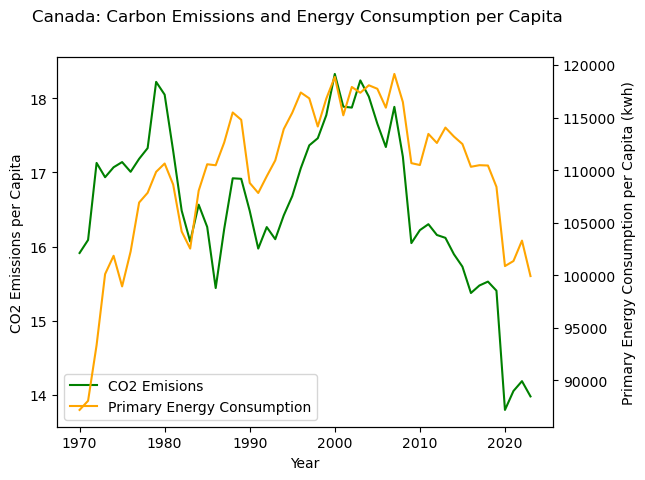

In [125]:
f, ax1 = plt.subplots()
ax2 = ax1.twinx()

# CO2 Emissions Plot

canada_energy_emissions_df_after_1970 = canada_energy_emissions_df[canada_energy_emissions_df["Year"] >= 1970]

p1 = ax1.plot(canada_energy_emissions_df_after_1970["Year"], canada_energy_emissions_df_after_1970["emissions_total_per_capita"], color = "green", label = "CO2 Emisions")
ax1.set_ylabel("CO2 Emissions per Capita")
ax1.set_xlabel("Year")

p2 = ax2.plot(canada_energy_emissions_df_after_1970["Year"], canada_energy_emissions_df_after_1970["primary_energy_consumption_per_capita__kwh"], color = "orange", label = "Primary Energy Consumption")
ax2.set_ylabel("Primary Energy Consumption per Capita (kwh)")

plots = p1 + p2
labs = [l.get_label() for l in plots]
ax1.legend(plots, labs, loc = 0)

f.suptitle("Canada: Carbon Emissions and Energy Consumption per Capita")

In [127]:
india_energy_emissions_df = energy_emissions_df[energy_emissions_df["Entity"] == "India"]
india_energy_emissions_df.head()

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region
24878,India,IND,1858,0.001631,NaN,241923000.0,NaN
24879,India,IND,1859,0.002623,NaN,242698983.0,NaN
24880,India,IND,1860,0.002641,NaN,243477427.0,NaN
24881,India,IND,1861,0.002036,NaN,244258342.0,NaN
24882,India,IND,1862,0.002246,NaN,245041734.0,NaN


Text(0.5, 0.98, 'India: Carbon Emissions and Energy Consumption per Capita')

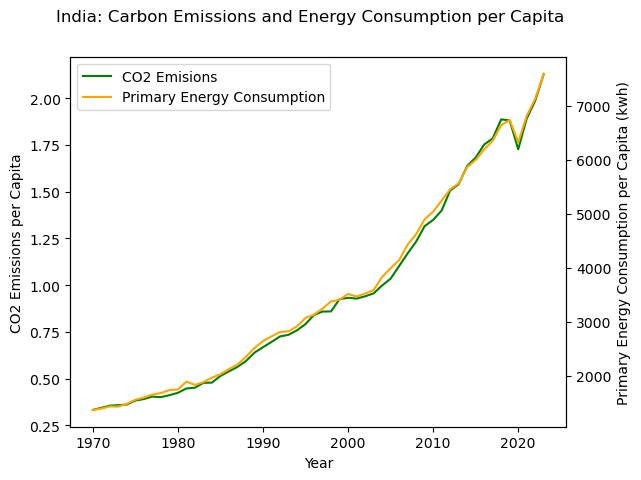

In [129]:
f, ax1 = plt.subplots()
ax2 = ax1.twinx()

# CO2 Emissions Plot

india_energy_emissions_df_after_1970 = india_energy_emissions_df[india_energy_emissions_df["Year"] >= 1970]

p1 = ax1.plot(india_energy_emissions_df_after_1970["Year"], india_energy_emissions_df_after_1970["emissions_total_per_capita"], color = "green", label = "CO2 Emisions")
ax1.set_ylabel("CO2 Emissions per Capita")
ax1.set_xlabel("Year")

p2 = ax2.plot(india_energy_emissions_df_after_1970["Year"], india_energy_emissions_df_after_1970["primary_energy_consumption_per_capita__kwh"], color = "orange", label = "Primary Energy Consumption")
ax2.set_ylabel("Primary Energy Consumption per Capita (kwh)")

plots = p1 + p2
labs = [l.get_label() for l in plots]
ax1.legend(plots, labs, loc = 0)

f.suptitle("India: Carbon Emissions and Energy Consumption per Capita")

In [131]:
uk_energy_emissions_df = energy_emissions_df[energy_emissions_df["Entity"] == "United Kingdom"]
uk_energy_emissions_df.head()

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region
56606,United Kingdom,GBR,1750,1.001912,NaN,9288177.0,NaN
56607,United Kingdom,GBR,1760,1.070363,NaN,9823145.0,NaN
56608,United Kingdom,GBR,1770,1.262799,NaN,10371579.0,NaN
56609,United Kingdom,GBR,1780,1.452038,NaN,10935473.0,NaN
56610,United Kingdom,GBR,1790,1.770789,NaN,11517141.0,NaN


Text(0.5, 0.98, 'UK: Carbon Emissions and Energy Consumption per Capita')

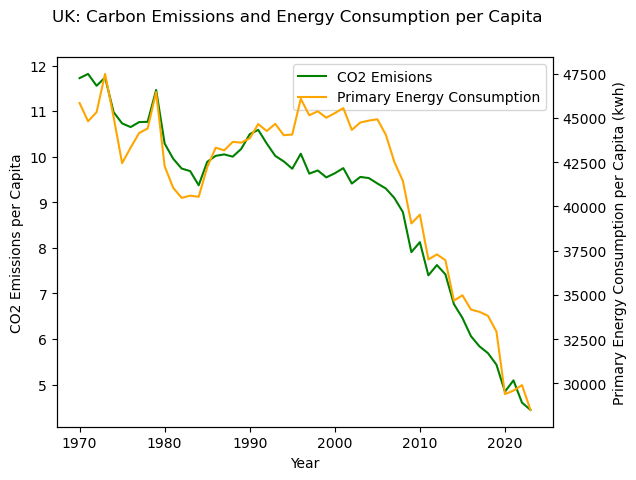

In [133]:
f, ax1 = plt.subplots()
ax2 = ax1.twinx()

# CO2 Emissions Plot

uk_energy_emissions_df_after_1970 = uk_energy_emissions_df[uk_energy_emissions_df["Year"] >= 1970]

p1 = ax1.plot(uk_energy_emissions_df_after_1970["Year"], uk_energy_emissions_df_after_1970["emissions_total_per_capita"], color = "green", label = "CO2 Emisions")
ax1.set_ylabel("CO2 Emissions per Capita")
ax1.set_xlabel("Year")

p2 = ax2.plot(uk_energy_emissions_df_after_1970["Year"], uk_energy_emissions_df_after_1970["primary_energy_consumption_per_capita__kwh"], color = "orange", label = "Primary Energy Consumption")
ax2.set_ylabel("Primary Energy Consumption per Capita (kwh)")

plots = p1 + p2
labs = [l.get_label() for l in plots]
ax1.legend(plots, labs, loc = 0)

f.suptitle("UK: Carbon Emissions and Energy Consumption per Capita")

In [135]:
matrix = new_df_2000_no_na[["emissions_total_per_capita", "primary_energy_consumption_per_capita__kwh", "population_historical", "investment_estimated__field_all"]].corr()
matrix

,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,investment_estimated__field_all
emissions_total_per_capita,1.000000,0.751502,-0.063240,0.060709
primary_energy_consumption_per_capita__kwh,0.751502,1.000000,-0.100984,0.014544
population_historical,-0.063240,-0.100984,1.000000,0.697023
investment_estimated__field_all,0.060709,0.014544,0.697023,1.000000


<Axes: >

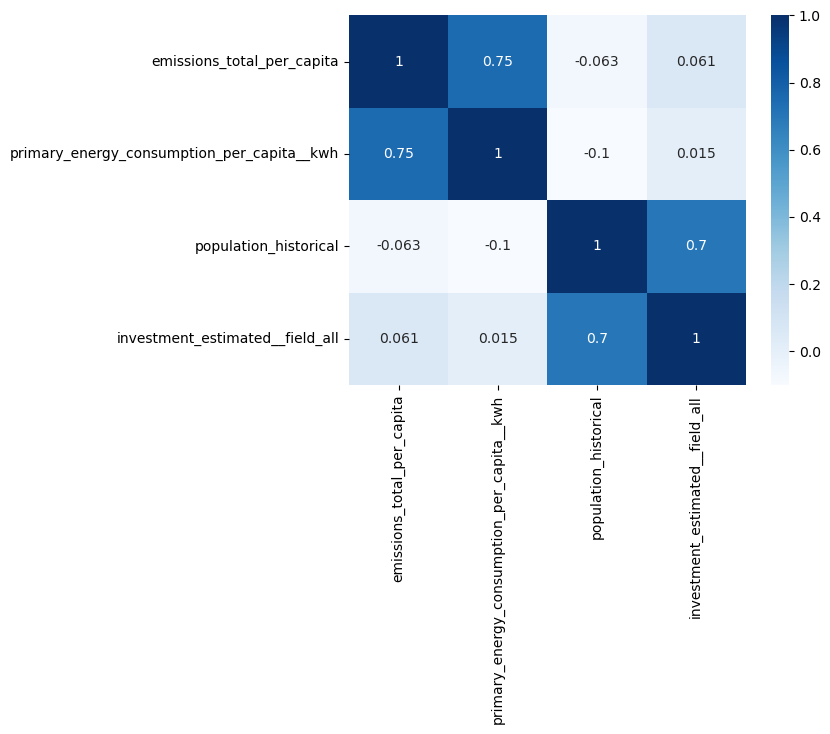

In [136]:
import seaborn as sns

# plotting correlation matrix
sns.heatmap(matrix, cmap="Blues", annot=True)

In [137]:
new_df_2000_no_na_no_us = new_df_2000_no_na[new_df_2000_no_na["Code"] == "USA"]

matrix = new_df_2000_no_na_no_us[["emissions_total_per_capita", "primary_energy_consumption_per_capita__kwh", "population_historical", "investment_estimated__field_all"]].corr()

<Axes: >

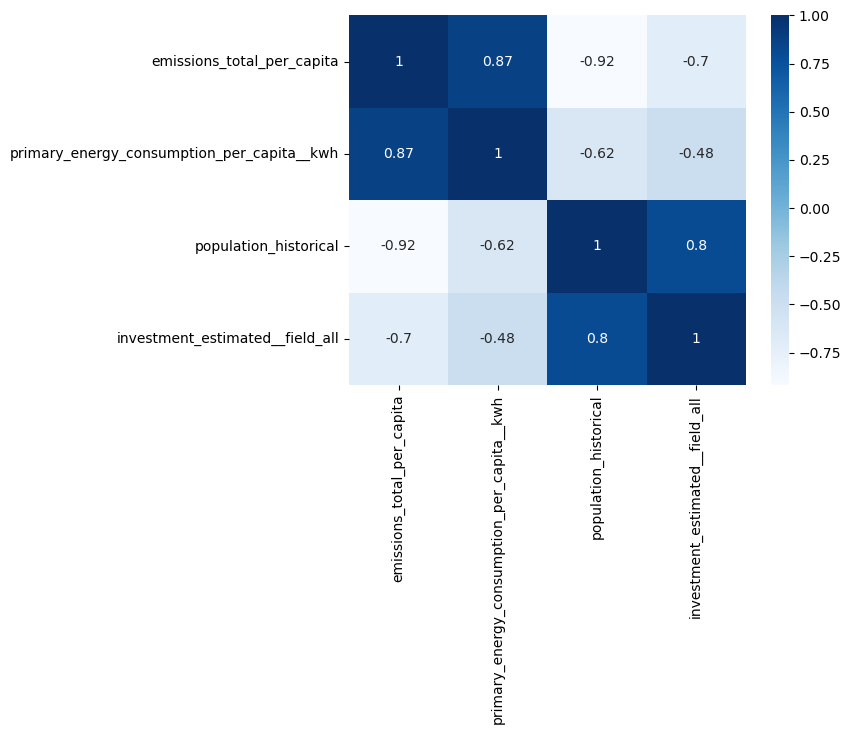

In [138]:
# plotting correlation matrix
sns.heatmap(matrix, cmap="Blues", annot=True)

In [139]:
new_df_2023 = new_df_2000_no_na[new_df_2000_no_na["Year"] == 2023]

In [140]:
new_df_2023

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region,investment_estimated__field_all
689,Argentina,ARG,2023,4.299799,22277.7930,4.553840e+07,South America,3.165892e+08
954,Armenia,ARM,2023,2.584880,NaN,2.943395e+06,Asia,6.225069e+06
1272,Australia,AUS,2023,14.478477,63256.8800,2.645112e+07,Oceania,5.664813e+08
1510,Austria,AUT,2023,6.415691,42952.6130,9.130434e+06,Europe,1.511803e+08
2165,Bangladesh,BGD,2023,0.661509,2940.0205,1.714670e+08,Asia,0.000000e+00
...,...,...,...,...,...,...,...,...
27942,Uzbekistan,UZB,2023,3.499589,16622.7360,3.565231e+07,Asia,0.000000e+00
28424,Vietnam,VNM,2023,3.335514,13744.1490,1.003522e+08,Asia,2.578957e+07
28647,World,OWID_WRL,2023,4.670392,21393.7100,8.091735e+09,NaN,1.186409e+11
28753,Zambia,ZMB,2023,0.373911,NaN,2.072397e+07,Africa,0.000000e+00


In [141]:
new_df_2023.dropna(subset = ["primary_energy_consumption_per_capita__kwh"], inplace = True)

C:\Users\eliss\AppData\Local\Temp\ipykernel_10692\2134246629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2023.dropna(subset = ["primary_energy_consumption_per_capita__kwh"], inplace = True)


In [142]:
new_df_2023

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region,investment_estimated__field_all
689,Argentina,ARG,2023,4.299799,22277.7930,4.553840e+07,South America,3.165892e+08
1272,Australia,AUS,2023,14.478477,63256.8800,2.645112e+07,Oceania,5.664813e+08
1510,Austria,AUT,2023,6.415691,42952.6130,9.130434e+06,Europe,1.511803e+08
2165,Bangladesh,BGD,2023,0.661509,2940.0205,1.714670e+08,Asia,0.000000e+00
3057,Belgium,BEL,2023,7.117667,54942.2400,1.171289e+07,Europe,2.329954e+08
...,...,...,...,...,...,...,...,...
27216,United Kingdom,GBR,2023,4.442824,28501.3870,6.868296e+07,Europe,4.135225e+09
27472,United States,USA,2023,14.299026,77027.8360,3.434773e+08,North America,7.490804e+10
27942,Uzbekistan,UZB,2023,3.499589,16622.7360,3.565231e+07,Asia,0.000000e+00
28424,Vietnam,VNM,2023,3.335514,13744.1490,1.003522e+08,Asia,2.578957e+07


In [143]:
new_df_2023.sort_values("investment_estimated__field_all").head(20)

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region,investment_estimated__field_all
27942,Uzbekistan,UZB,2023,3.499589,16622.7360,35652309.0,Asia,0.0
2165,Bangladesh,BGD,2023,0.661509,2940.0205,171466986.0,Asia,0.0
20131,Qatar,QAT,2023,38.841370,226847.6600,2979087.0,Asia,0.0
18188,Pakistan,PAK,2023,0.810760,3895.0408,247504504.0,Asia,0.0
6238,Cyprus,CYP,2023,5.334076,25469.9450,1344979.0,Europe,0.0
7340,Ecuador,ECU,2023,2.401150,12880.8970,17980079.0,South America,889296.0
20750,Russia,RUS,2023,12.485688,60175.3670,145440504.0,Europe,889296.0
13897,Latvia,LVA,2023,3.459886,21982.4550,1882400.0,Europe,889296.0
25269,Thailand,THA,2023,3.687303,19370.2990,71702438.0,Asia,889296.0
17455,North Macedonia,MKD,2023,4.066396,16076.1550,1831800.0,Europe,889296.0


In [144]:
conditions = [
    new_df_2023["investment_estimated__field_all"] == 0,
    new_df_2023["investment_estimated__field_all"] != 0
]

choices = [np.log(1), np.log(new_df_2023["investment_estimated__field_all"])]

new_df_2023["investments_log"] = np.select(conditions, choices)

C:\Users\eliss\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\eliss\AppData\Local\Temp\ipykernel_10692\1351367541.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2023["investments_log"] = np.select(conditions, choices)


In [145]:
new_df_2023.head()

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region,investment_estimated__field_all,investments_log
689,Argentina,ARG,2023,4.299799,22277.7930,45538402.0,South America,316589233.0,19.573116
1272,Australia,AUS,2023,14.478477,63256.8800,26451125.0,Oceania,566481297.0,20.154955
1510,Austria,AUT,2023,6.415691,42952.6130,9130434.0,Europe,151180252.0,18.833983
2165,Bangladesh,BGD,2023,0.661509,2940.0205,171466986.0,Asia,0.0,0.000000
3057,Belgium,BEL,2023,7.117667,54942.2400,11712894.0,Europe,232995447.0,19.266529


In [146]:
new_df_2023["population_log"] = np.log(new_df_2023["population_historical"])

C:\Users\eliss\AppData\Local\Temp\ipykernel_10692\2272732943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2023["population_log"] = np.log(new_df_2023["population_historical"])


In [147]:
new_df_2023["owid_region"].unique()

array(['South America', 'Oceania', 'Europe', 'Asia', 'North America',
       'Africa', nan], dtype=object)

In [148]:
south_america_df_2023 = new_df_2023[new_df_2023["owid_region"] == 'South America']
oceania_df_2023 = new_df_2023[new_df_2023["owid_region"] == 'Oceania']
europe_df_2023 = new_df_2023[new_df_2023["owid_region"] == 'Europe']
asia_df_2023 = new_df_2023[new_df_2023["owid_region"] == 'Asia']
north_america_df_2023 = new_df_2023[new_df_2023["owid_region"] == 'North America']
africa_df_2023 = new_df_2023[new_df_2023["owid_region"] == 'Africa']

In [149]:
north_america_df_2023

,Entity,Code,Year,emissions_total_per_capita,primary_energy_consumption_per_capita__kwh,population_historical,owid_region,investment_estimated__field_all,investments_log,population_log
5004,Canada,CAN,2023,13.977394,99916.400,39299099.0,North America,2.022258e+09,21.427481,17.486712
15951,Mexico,MEX,2023,3.719935,18279.035,129739764.0,North America,1.236121e+08,18.632659,18.681041
27472,United States,USA,2023,14.299026,77027.836,343477332.0,North America,7.490804e+10,25.039527,19.654632


AttributeError: 'numpy.ndarray' object has no attribute 'legend'

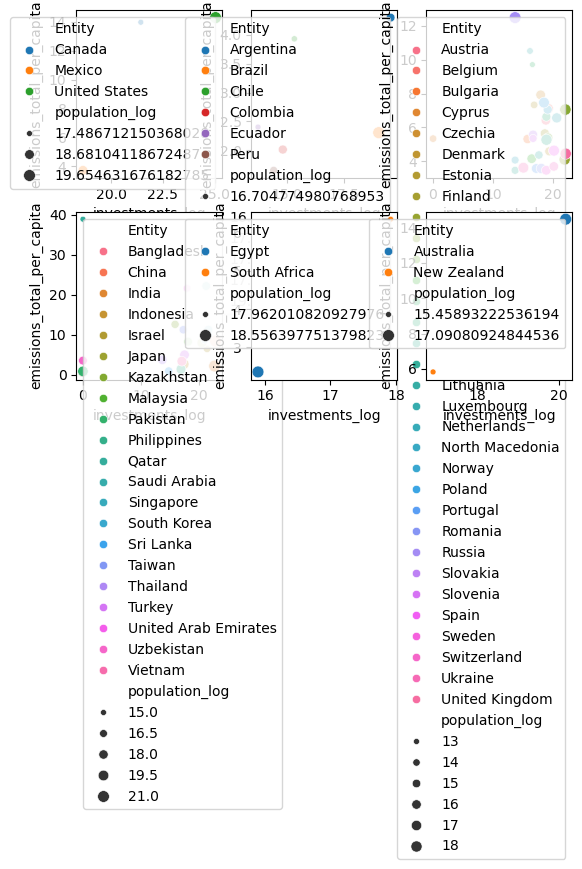

In [150]:
f, axes = plt.subplots(2, 3)

# North America
sns.scatterplot(data = north_america_df_2023, 
                x = "investments_log", 
                y = "emissions_total_per_capita", 
                size = "population_log",
                hue = "Entity",
                ax = axes[0][0])

# South America

sns.scatterplot(data = south_america_df_2023, 
                x = "investments_log", 
                y = "emissions_total_per_capita", 
                size = "population_log",
                hue = "Entity",
                ax = axes[0][1])


# Europe

sns.scatterplot(data = europe_df_2023, 
                x = "investments_log", 
                y = "emissions_total_per_capita", 
                size = "population_log",
                hue = "Entity",
                ax = axes[0][2])

# Asia

sns.scatterplot(data = asia_df_2023, 
                x = "investments_log", 
                y = "emissions_total_per_capita", 
                size = "population_log",
                hue = "Entity",
                ax = axes[1][0])

# Africa

sns.scatterplot(data = africa_df_2023, 
                x = "investments_log", 
                y = "emissions_total_per_capita", 
                size = "population_log",
                hue = "Entity",
                ax = axes[1][1])

# Oceania

sns.scatterplot(data = oceania_df_2023, 
                x = "investments_log", 
                y = "emissions_total_per_capita", 
                size = "population_log",
                hue = "Entity",
                ax = axes[1][2])

axes.legend([], [], frameon = False)


In [ ]:
# North America
ax = sns.scatterplot(data = north_america_df_2023, 
                x = "investments_log", 
                y = "emissions_total_per_capita", 
                size = "population_log",
                hue = "Entity")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
# South America

ax = sns.scatterplot(data = south_america_df_2023, 
                x = "investments_log", 
                y = "emissions_total_per_capita", 
                size = "population_log",
                hue = "Entity")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
# Europe

ax = sns.scatterplot(data = europe_df_2023, 
                x = "investments_log", 
                y = "emissions_total_per_capita", 
                size = "population_log",
                hue = "Entity")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
# Asia

ax = sns.scatterplot(data = asia_df_2023, 
                x = "investments_log", 
                y = "emissions_total_per_capita", 
                size = "population_log",
                hue = "Entity")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
# Africa

ax = sns.scatterplot(data = africa_df_2023, 
                x = "investments_log", 
                y = "emissions_total_per_capita", 
                size = "population_log",
                hue = "Entity")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
# Oceania

ax = sns.scatterplot(data = oceania_df_2023, 
                x = "investments_log", 
                y = "emissions_total_per_capita", 
                size = "population_log",
                hue = "Entity")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))